<a href="https://colab.research.google.com/github/sunidhi-shetty/classical_machine_learning_unsupervised/blob/main/08-Lecture-PCA_2%2BTsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content

## PCA Recap

#### What's the goal of PCA ?

Goal of PCA is to:
- find the Principal Component (PC) which
    - maximizes the variance or
    - length of projection on PC

where Principal Component is new vector made using linear combination of existing features.

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/235/original/download1.png?1706089955" width=800></center>

#### How do we find the PC ?

For this, we came up with an equation:

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/236/original/download2.png?1706089987" width=500></center>

In this entire equation, the only important term is V

IF we have **V**,
- we can find multiple **eigen vectors and eigen values** for **V**.


Note: eigen vectors are always unit vectors.

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/237/original/download3.png?1706090020" width=800></center>

Imagine a 3D plot for which
- we have 3 new axis i.e. eigen vectors

These eigen vectors have same length but
- whichever vector has larger lambda value (λ) get bigger
- as lambda (magnitude) is multiplied with the vector.


In short,
- lambda tells the importance of the eigen vector.
- i.e. PCs with lower lambda will not preserve info. and can be removed without much risk of loss of information.

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/238/original/download4.png?1706090050" width=800></center>

#### How do we find V?

We know that V =

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/239/original/download5.png?1706090087" width=500></center>

Using code, we can find V in two ways:

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/240/original/download6.png?1706090178" width=500></center>

After we get V,
- we can get eigen vectors and vectors with single line of code:  `u, lambda  = np.linalg.eig(V)`


Let's see how we can implement but before that
- let's look into infromation loss in PCA

## Information loss in PCA

Say, we have 5 features and we applied PCA on it

**How many eigen vectors will be get?**
> We'll get 5 eigen vectors

Suppose the eigen values for these vectors is as follows:

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/241/original/download7.png?1706090210" width=800></center>

#### If we decide to keep all the eigen vectors, will there be any loss in information ?


No. As we are not discarding any vector. All the information is preserved.

**But why?**

Say, we have 2D space (black lines) and a point (<font color="purple">purple</font>)
- we find its eigen vectors (<font color="darkblue">blue lines</font>)

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/242/original/download8.png?1706090244" width=800></center>

We can always use PCs cordinate system
- and We'll be able to recreate the point in original feature space.
- i.e. we can find the coordinates of point in original feature space.


#### What happens if we decide to drop a PC?

If we were to drop PC2,
- we'll not able be recreate the position of the point in original feature space correctly.

As the point is projected to PC1 now,
- the position of point will be shifted in original feature space if we were to go back to original space.
- as we have deleted some of the information.



<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/243/original/download9.png?1706090274" width=800></center>


The change in position shows that
- there is a loss in information.

To conclude:
- Uptil we maintain all of our PCs, we have 100% of information
- the moment we start dropping components, we lose information.

#### If we decide to keep top 3 eigen vectors, how do we find how much info will be left ?

Say, we decided to keep only 3 Principal Components i.e. top 3 (10, 7, 6)

**Note: The eigen value is also called as explained variance**

Using these explained variance/ eigen value,
- we calculate explained ratio
- which tells us how much of variance is preserved.

Let's see how

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/244/original/download10.png?1706090316" width=800></center>

This helps us in deciding the tradeoff of
- dropping PCs vs information preserved.

## Code implemetnation: PCA from scratch

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!gdown 16elpyaPZhS63ibzIdetEjZhCO4FpVSZu

Downloading...
From: https://drive.google.com/uc?id=16elpyaPZhS63ibzIdetEjZhCO4FpVSZu
To: /content/pca_2d_data.csv
100% 778/778 [00:00<00:00, 2.37MB/s]


In [ ]:
data = pd.read_csv('/content/pca_2d_data.csv')
data.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


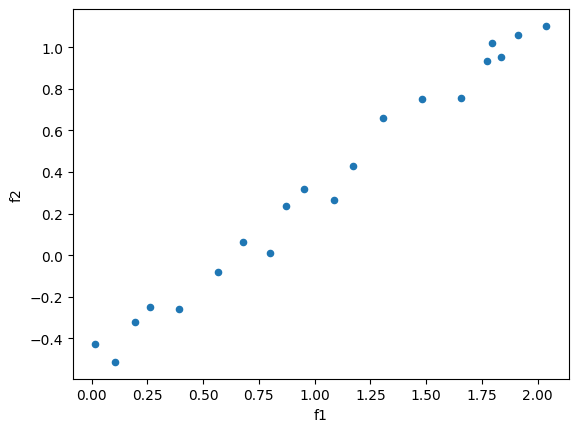

In [ ]:
data.plot(x='f1', y='f2', kind='scatter')
plt.show()

### From scratch

In [ ]:
## Implement PCA!!
# Step 1: Column standardization
x_data = data['f1'].values
y_data = data['f2'].values

mean_x = np.mean(x_data)
mean_y = np.mean(y_data)

std_x = np.std(x_data)
std_y = np.std(y_data)

x_data_cs = (x_data - mean_x) / std_x
y_data_cs = (y_data - mean_y) / std_y

X_st = np.zeros((len(x_data), 2))
X_st[:, 0] = x_data_cs
X_st[:, 1] = y_data_cs



Documentation np.linalg.eig: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [ ]:
# Step 2: Eigenvalue decomposition
cov_X_st = np.matmul(X_st.T, X_st) / (len(x_data)-1)
eigenvalues, eigenvectors = np.linalg.eig(cov_X_st)

eigenvectors = eigenvectors.T  #  thats how we want them (horizontal)
print(eigenvalues)



[2.09718701 0.00807615]


In [ ]:
# Step 3: Reduce the dimension! Choose the eigenvector corresponding to the largest eigenvalue
X_prime = eigenvectors[0].dot(X_st.T)
X_prime_reduced = X_prime



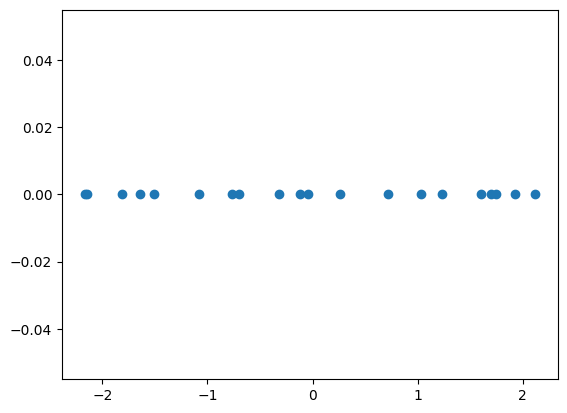

In [ ]:
# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(x_data),)))
plt.show()

In [ ]:
eigenvectors

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Note:
- each column here represents an eigen vector

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/248/original/download14.png?1706090454" width=800></center>

### PCA impl: using helper libraries

[2.09718701 0.00807615]


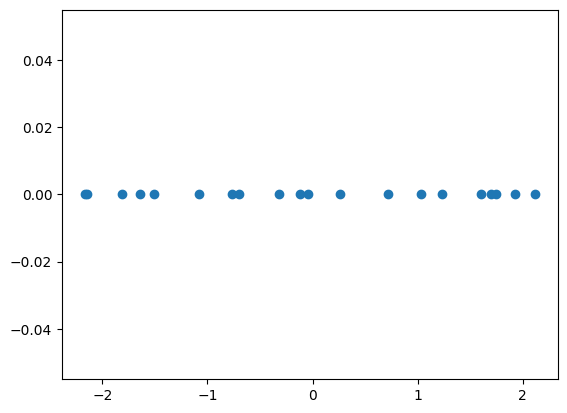

In [ ]:
from sklearn.preprocessing import StandardScaler

data_sc = StandardScaler().fit_transform(data)
cov = np.cov(data_sc.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)

eigenvectors = eigenvectors.T # We want like this
print(eigenvalues)

X_prime_reduced = eigenvectors[0].dot(data_sc.T)

# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(data_sc),)))
plt.show()

In [ ]:
eigenvalues

array([2.09718701, 0.00807615])

In [ ]:
# explained variance
eigenvalues[0] / eigenvalues.sum()

0.9961638305134559

### Sklearn impl

In [ ]:
from sklearn import decomposition


pca = decomposition.PCA(n_components=2)

X_p = pca.fit_transform(data_sc)
print(pca.explained_variance_)



[2.09718701 0.00807615]


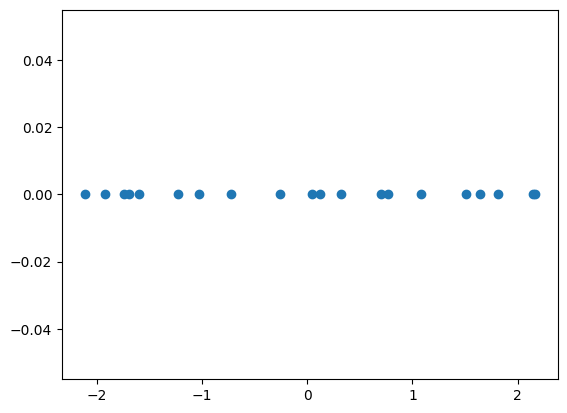

In [ ]:
plt.figure()
plt.scatter(X_p[:, 0], np.zeros((len(data_sc),)))
plt.show()

In [ ]:
pca.components_
# here each row represent a PC. First is x=y. Second is x = -y => Matches scratch impl

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [ ]:
pca.explained_variance_

array([2.09718701, 0.00807615])

In [ ]:
pca.explained_variance_ratio_

array([0.99616383, 0.00383617])

## Usecase: High Dimensional Visualization using PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)
from matplotlib.pyplot import cm
import seaborn as sns

#### **Loading dataset**

In sklearn we have a very interesting dataset called **'digits'**.
The dataset contains information about handwritten digits from $0$ to $9$

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

You can see below that dataset has some **data**, a **target variable**, and actual images in **images** which can be used for visualizing images

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

**Q. So, how our dataset looks like?**

- We define **data** as our features and **target** as target variable

**NOTE:** Do not confuse below given $Y$ with $y_{i}$s that we used when understanding PCA


In [ ]:
X = digits.data
Y = digits.target

Our dataset contains $1797$ images with $64$ features

In [ ]:
X.shape

(1797, 64)

If you see the shape of an image, it is represented as $8$x$8$ matrix.

We use grayscale representation where an image pixel takes values in $[0,255]$; where $0$ indicates pure black and $255$ indicates pure white

In [ ]:
digits.images.shape

(1797, 8, 8)

> **Instructor Notes:** Explain how $8$x$8$ image results into 64 features

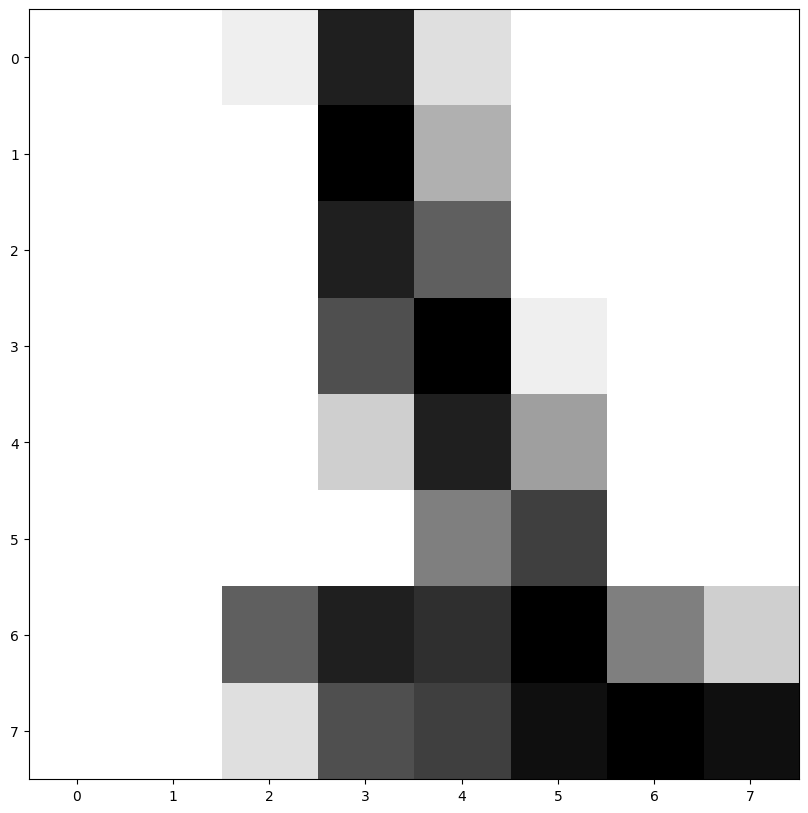

In [ ]:
plt.gray()
plt.imshow(digits.images[1000], cmap=plt.cm.gray_r) #------> seems like number 1

#### **Implementing PCA**

We can implement PCA using sklearn's **PCA** method present in **decomposition** module.

Here we'll use PCA for mapping 64-dimensional digits data into 2-dimensional data. We do this by using parameter **n_components** in **PCA** method

We then fit PCA model on to our data $X(1797$ x $64)$ and this will calculate the top two eigen vectors will get computed ($u_{1}$, $u_{2}$)

Then, we use transform the data which basically does matrix multiplication of $x_{i}$s with eigen vectors ($u_{1}$, $u_{2}$)

In [ ]:
from sklearn import decomposition

In [ ]:
#PCA
# %%time prints the time taken for execution for this cell
%%time
pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(X)
Z1 = pca_2D.transform(X)

CPU times: user 17.2 ms, sys: 18.3 ms, total: 35.5 ms
Wall time: 40.3 ms


Let's now plot the results. For that we are going to use customized colormap using matlpotlib's **ListedColormap**

We'll use 10 different colors using target variable $Y$

#### **Plotting results**

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

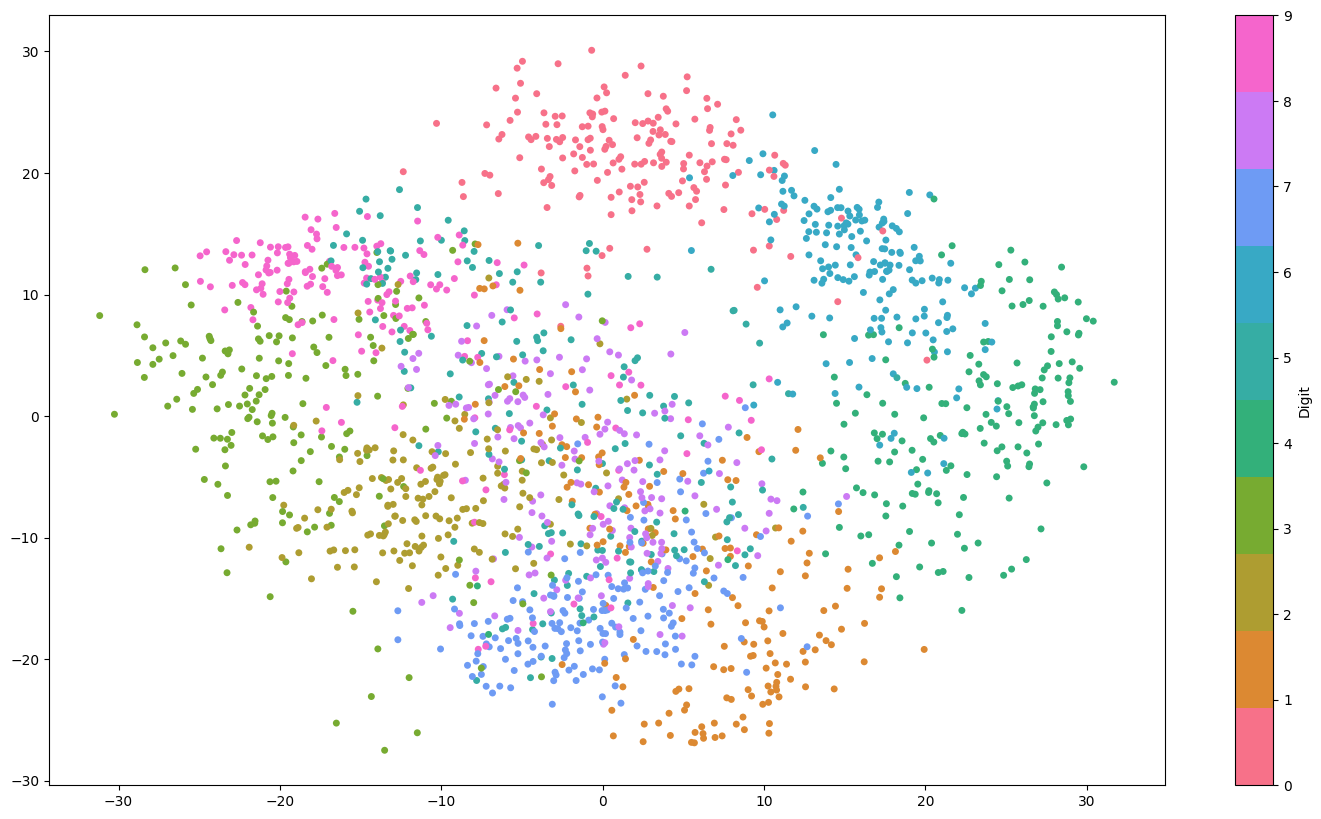

In [ ]:
fig, ax = plt.subplots()

"""
  on x-axis we use 0th dimension of z1
  on y-axis we use 1th dimension of z2
"""

im = ax.scatter(Z1[:,0], Z1[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

#### **What can we interpret from this?**

- $7$ is represented by light bluish color, $8$ is represented by light purplish color and $9$ with slightly more dark pink color

- You can see all these points are getting overlapped in the central region.

- This tells the similarity between three digits, as people have different handwritings and sometimes different digits often appears the same

- Whereas digits like $3$ and $4$  are difficult to get mixed and hence they are grouped around the left and right side of the plots respectively.

#### Variance preserved by 2 components

In [ ]:
decomposition.PCA(n_components=2).fit(X).explained_variance_ratio_.sum()

0.28509364823695366

Notice that
- Only 28% of variance is preserved by 2 components.

#### Limitation of PCA

- Now, imagine if we didn't have any $Y$ labels and after applying PCA we got the the results as sbove.

- It would be very hard to see what all points represents which digit. We can hardly identify 3 clusters if we don't have any $Y$ labels.

**Q. Why does this happen?**

- It is because, maybe, the data is very well seperated in 64 dimensions, where one can easily identify the clusters of different digits.

- But, when visualizing on 2D space, PCA is not ablt to preserve neighborhood, it is just prioritizing variance

#### **Quiz-3**
```
Dropping unimportant features after applying PCA will make the data standardized. Is the statement True or False?

a. True
b. False
```
**Answer:**

b. False

With this motivation, let's try to learn another algorithm which can also be used for visualizing high dimensional data along with preserving the neighborhood information.
***

Before this,
- let's motivate ourselves by comparing results of tSNE on digits datasets:

In [ ]:
from sklearn.manifold import TSNE

z2 = TSNE(n_components=2, random_state=0, perplexity=25).fit_transform(X)


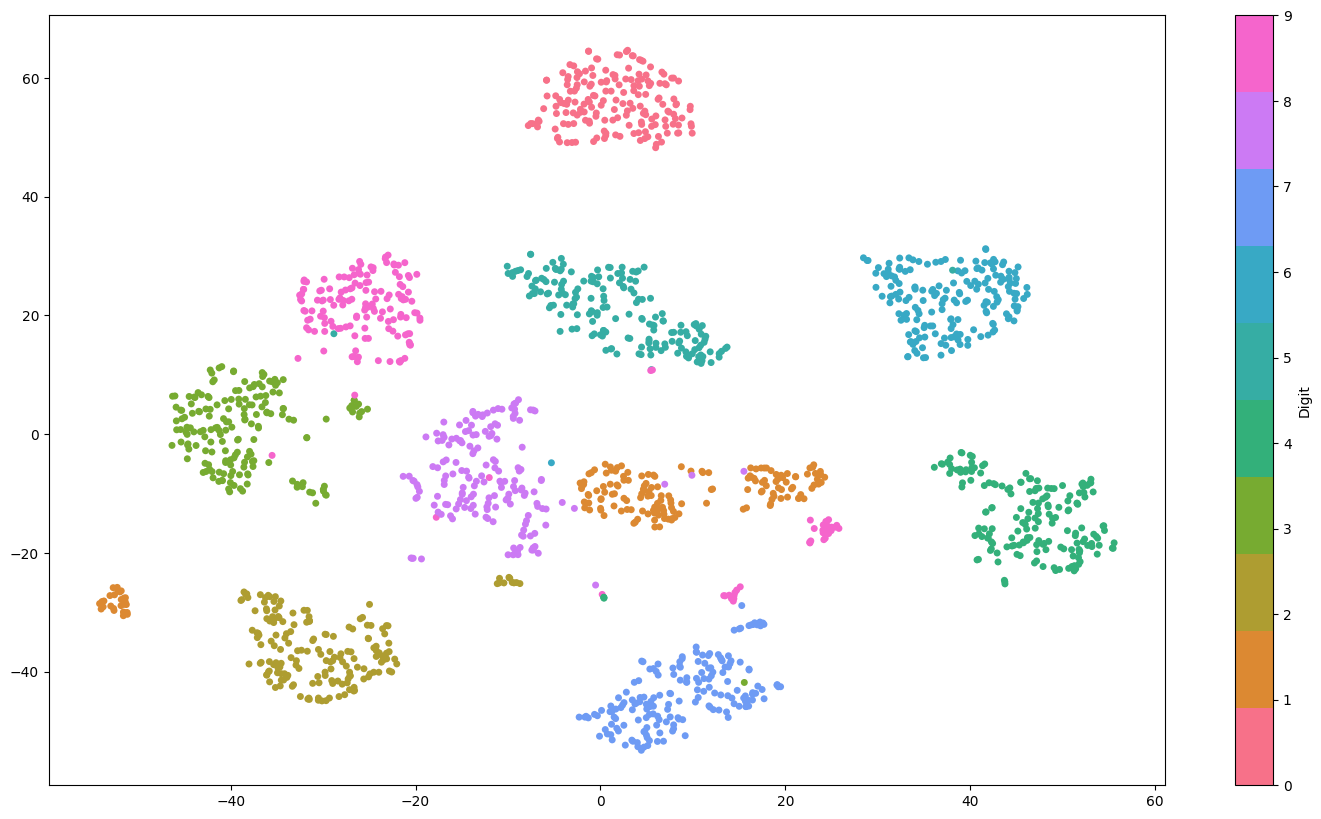

In [ ]:
fig, ax = plt.subplots()
im = ax.scatter(z2[:,0], z2[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

## t-SNE

### Introduction



t-SNE stands for **t-distributed Stochastic Neighborhood Embedding** which was presented by **Laurens van der Maaten** and **Geoffrey Hinton** in 2008.

Let's understand what makes it different from PCA

Say, we have the following data:

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/254/original/download20.png?1706090691" width=800></center>

and we apply PCA on it.


#### How will the Principal Component look like ?

Most probably, we'll get the PC as follows:

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/255/original/download21.png?1706090718" width=800></center>

Now, if we were to project our data on this,
- and look it in 1D

We will get:

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/256/original/download22.png?1706090750" width=800></center>

Notice that
- since we have projected the data onto single PC
    - the smaller cluster is overlapping the the rest of the data

PCA is not able to distinguish between different cluster of data.
- as its principle revolves preserving maximum variance.

This is one of the issue of PCA

#### Do we have a better approach ?

Our goal is:
- when we are reducing dimension
- we want to make sure the points which are in different clusters remains separate

In short,
- we want to preserve relative distances


**What does that mean?**
- It means that points which were close in higher dimension
- should remain close when projected to lower dimension.



If were to preseve relative distances in above example,
the output would look :

<center><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/257/original/download23.png?1706090784" width=800></center>

Notice that
- when preserving the relative distance
- <font color="orange">orange points</font> remain close to each other
- while the <font color="purple">pink points</font> remain close to each while projecting to lower dim.

However, since orange points are far from pink points,
- they should be far away in lower dimension as well.

This is what tSNE does
- i.e. preserve the local distance (relative distances)
- t-SNE tries to create an embedding that preserves the neighborhood using some probabilistic methods.

This is one of the main reason why tSNE is better for visualization



So, the goal of
- preserving the relative distance is better than preserving variance when it comes to visualization.

**To summarize:**

- When we go from $d$-dimensions to $d^\prime$-dimensions where $d < d^\prime$,
- the core idea behind t-SNE is to preserve the pairwise distance in a neighborhood as best as possible

But, there is a problem that t-SNE faces while preserving the neighborhood information. It is known as **The Crowding Problem**. Let's see what it is.



#### The Crowding Problem



Suppose we have a 2D data and we want to project it in 1D data using any neighborhood embedding method.

- We have four data points in shape of a square, where $a$ is at the origin, $b$ is on X-axis, $d$ is on Y-axis as shown in diagram given below.



Now, consider a case,
- when we choose the neighborhood of point $a$ that contains all the other points.

Let's try to project this data into 1D such that the pairwise distance is preserved

- We place point $a$ on an 1D axis, point $b$ on the right of point $a$, and point $d$ on the left of point $a$. Here, the distance of both the points $d$ and $b$ to point $a$ is same

- Now, if you try to project point $c$, it will be exactly projected at the coordinates of point $a$. Because, as $a$ is equidistant from point $b$ and $d$, so is the point $c$


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/258/original/download24.png?1706090823' width=800></center>




This is just a simple case we saw for better understanding.

In real-life data, there will be hundreds, probably thousands of points that will not be able to preserve pairwise distance when projected from a higher dimension to lower dimension



It's not always possible to respect the relative distances

When we can't respect the whole idea in exact way
- we do it probablistically.



#### How do we handle this ?

We can calculate the probability
- of A being the neighbour of B $P_N(A,B)$

#### What's the idea ?

Instead of focusing on respecting the distances,
- we will focus on respecting the probability

i.e.

If in high dimension,
- the $P_N(A,B)$ = x%

And when we convert it to low dim
- and the $P_N(A, B)$ is roughly equal/ similar to x%

We can say that lower dim representation is consistent with the high dim. representation.

#### How do we define this probability ?

If A and B are close,
- there is high chance that these two are neighbours

Inversely,
- if A and B are far,
- there's a low probability that these two are neighbour


Based on this, prob can be defined as :

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/259/original/download25.png?1706090854' width=800></center>

#### What'll be the PDF of this fn ?

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/260/original/download26.png?1706090921' width=800></center>

#### Is it a good choice to represent probabilities ?

There are **some flaws** with this approach:
1. P(A, B) will be ∞ (infinte) at distance =0,

2. Probability reduces too fast in the neighbourhood.

3. It is based on absolute distance not relative distance.

Let's understand the second point

Say, we have a point P
- and some points in neighbourhood of P

Imagine we have P1 at 2 units distance
- P2 and 4 units distance from P

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/261/original/download27.png?1706090955' width=800></center>

If were to use the above probability formula,
- Prob of P1 being in neighbour of P is 1/2
- Prob of P2 being the neighour of P is 1/4

as we move farther,
- prob will fall off quickly.


Instead,
- we would prefer that all the neighbourhood points have similar probability
- and then it drops off suddenly.

Let's focus on 3rd flaw.

Say, we have two clusters
- first one is dense
- second one is sparse

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/262/original/download28.png?1706090991' width=800></center>

#### Will the P(A,B) equal to P(C,D)  ?

If we were to use absolute distance,
- it means points within the certain region are to be considered neighbours.

Let's represent this region using circle

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/063/263/original/download29.png?1706091021' width=800></center>

Suppose we consider the radius of circle to threshold of distance to be considered neighbours.

Since it is based on absolute distance,
- if we were to put this circle on sparse cluster,
- only a handful of point will be considered as a part of cluster.


Instead, we should take a relative density approach
- which helps us in solving the problem recreating  different size/density cluster in lower dim.

To summarize:
- Current prob fn. is based on absolute distance
- there is no flexibility to get prob. based on cluster density.



We'll look how to solve these issues in next lecture